# Exploratory Data Analysis
Here we will try to understand the datset which consists of diseases and symptoms related to it.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset 

In [8]:
df = pd.read_csv('..\datasets\Disease_symptom_and_patient_profile_dataset.csv')

### Display basic info and first few rows

In [9]:
df.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [26]:
df.shape

(349, 10)

In [27]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

### Summary statistics for numeric and categorical columns

In [11]:
print("\nSummary Statistics (Numeric):")
print(df.describe())


Summary Statistics (Numeric):
              Age
count  349.000000
mean    46.323782
std     13.085090
min     19.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     90.000000


In [13]:
print("\nValue Counts for Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{df[col].value_counts()}")


Value Counts for Categorical Columns:

Disease
Asthma               23
Stroke               16
Osteoporosis         14
Diabetes             10
Hypertension         10
                     ..
Schizophrenia         1
Gout                  1
Testicular Cancer     1
Tonsillitis           1
Williams Syndrome     1
Name: count, Length: 116, dtype: int64

Fever
Yes    175
No     174
Name: count, dtype: int64

Cough
No     182
Yes    167
Name: count, dtype: int64

Fatigue
Yes    242
No     107
Name: count, dtype: int64

Difficulty Breathing
No     261
Yes     88
Name: count, dtype: int64

Gender
Female    176
Male      173
Name: count, dtype: int64

Blood Pressure
High      167
Normal    164
Low        18
Name: count, dtype: int64

Cholesterol Level
High      166
Normal    149
Low        34
Name: count, dtype: int64

Outcome Variable
Positive    186
Negative    163
Name: count, dtype: int64


In [15]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [18]:
df['Disease'].value_counts()

Disease
Asthma               23
Stroke               16
Osteoporosis         14
Diabetes             10
Hypertension         10
                     ..
Schizophrenia         1
Gout                  1
Testicular Cancer     1
Tonsillitis           1
Williams Syndrome     1
Name: count, Length: 116, dtype: int64

### Distribution of Diseases

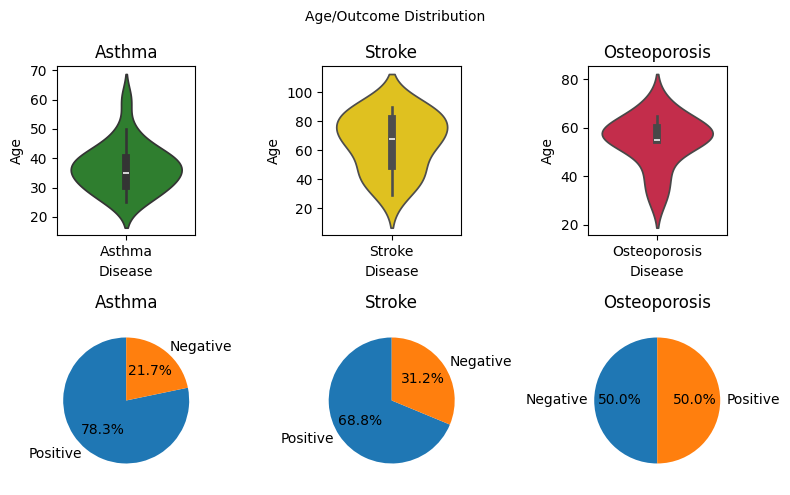

In [28]:
top_diseases = df['Disease'].value_counts().nlargest(3).index.tolist()

colors = ['forestgreen', 'gold', 'crimson']

num_diseases = len(top_diseases)
num_columns = num_diseases
fig, axes = plt.subplots(2, num_columns, figsize=(8, 5))

for i, disease in enumerate(top_diseases):
    filtered_df = df[df['Disease'] == disease]

    sns.violinplot(x='Disease', y='Age', data=filtered_df, ax=axes[0, i], color=colors[i % len(colors)])
    axes[0, i].set_title(disease)
    axes[0, i].set_xlabel('Disease')
    axes[0, i].set_ylabel('Age')

    outcome_counts = filtered_df['Outcome Variable'].value_counts()

    axes[1, i].pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, i].set_title(disease)
    axes[1, i].axis('equal')
    
fig.suptitle('Age/Outcome Distribution', fontsize = 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

C:\Users\S Pal\AppData\Local\Temp\ipykernel_7640\582850987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df,x = col,y = 'Age',ax = ax[i], scale="count", palette='Set2')
C:\Users\S Pal\AppData\Local\Temp\ipykernel_7640\582850987.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data = df,x = col,y = 'Age',ax = ax[i], scale="count", palette='Set2')
C:\Users\S Pal\AppData\Local\Temp\ipykernel_7640\582850987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df,x = col,y = 'Age',ax = ax[i], scale="count", palette='Set2')
C:\Users\S Pal\AppData\Local\Temp\ipyk

Text(0.5, 0.98, 'Age Distribution by Objective Value')

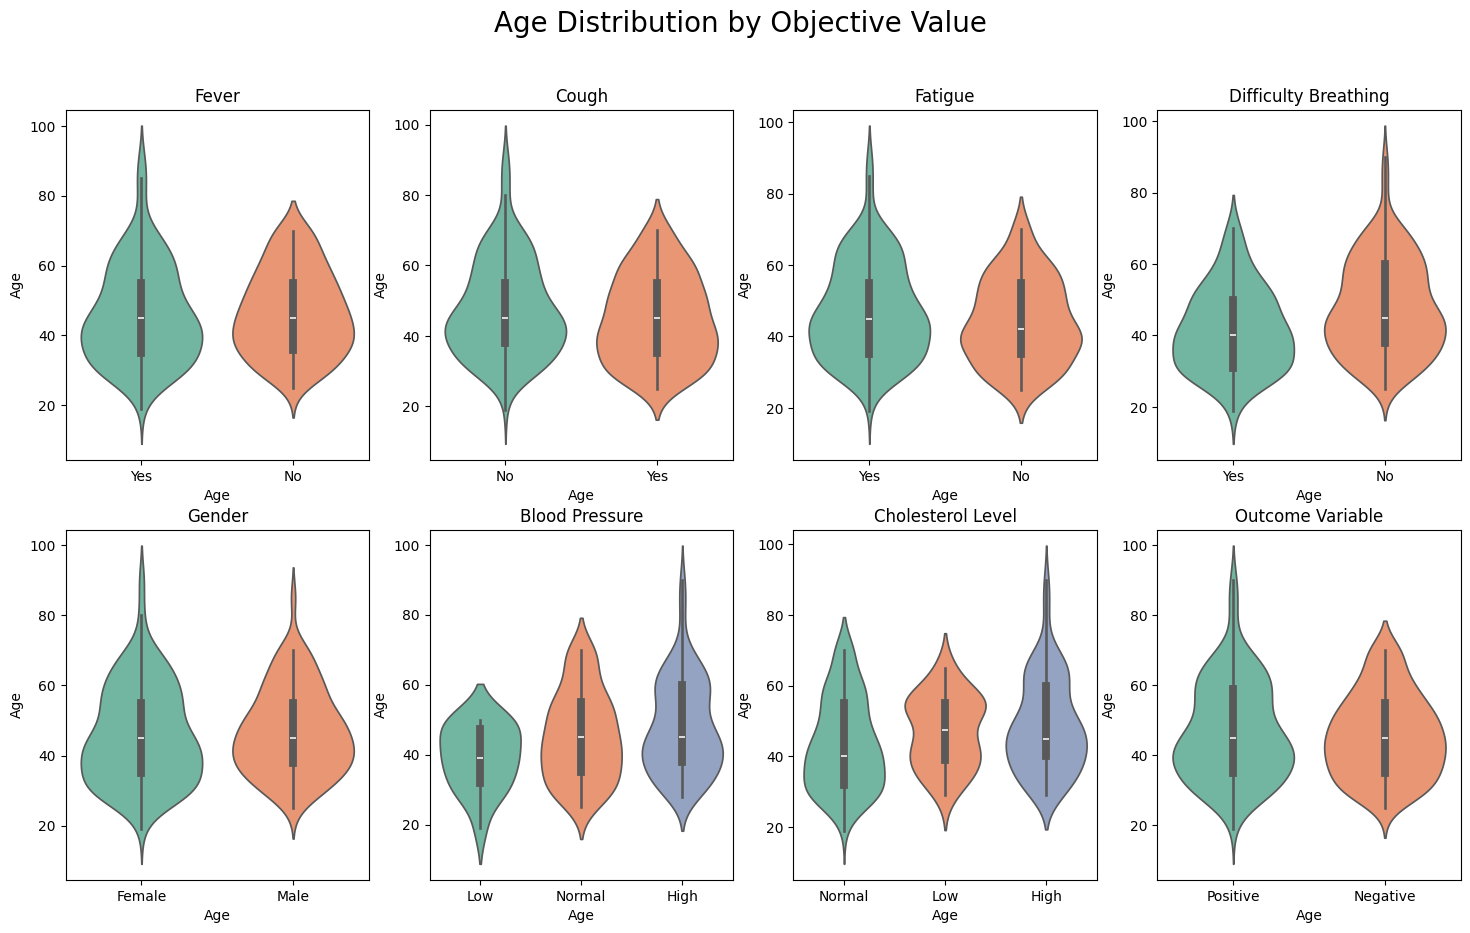

In [29]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing','Gender', 'Blood Pressure', 'Cholesterol Level','Outcome Variable']

fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (18,10))
ax = ax.flatten()

for i,col in enumerate(cols):
    sns.violinplot(data = df,x = col,y = 'Age',ax = ax[i], scale="count", palette='Set2')
    
    ax[i].set_title(col)
    ax[i].set_xlabel('Age')
    
fig.suptitle('Age Distribution by Objective Value', fontsize = 20)

### Symptom distributions

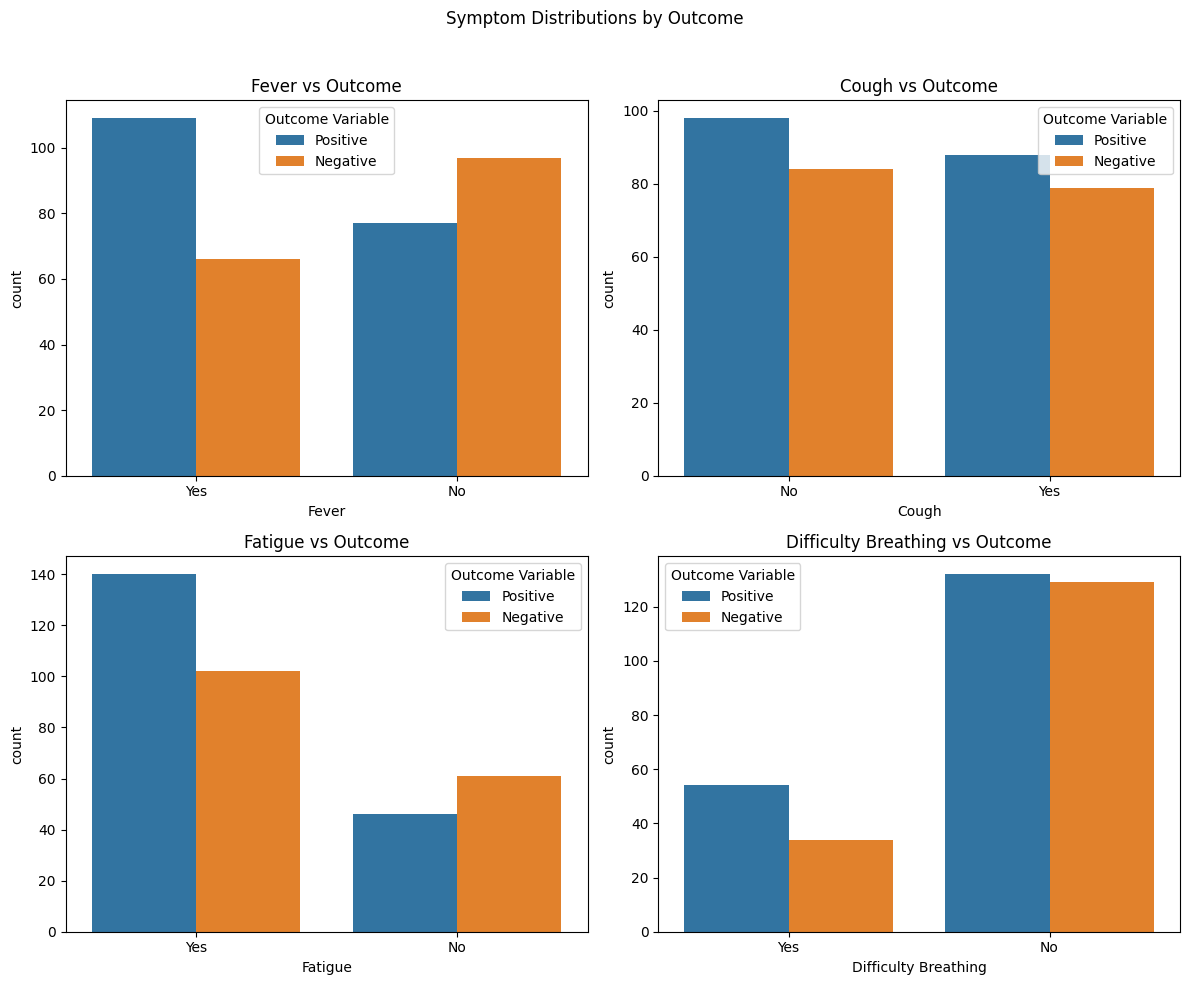

In [19]:
symptom_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Symptom Distributions by Outcome')
for i, col in enumerate(symptom_cols):
    sns.countplot(data=df, x=col, hue='Outcome Variable', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs Outcome')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Age distribution by Outcome

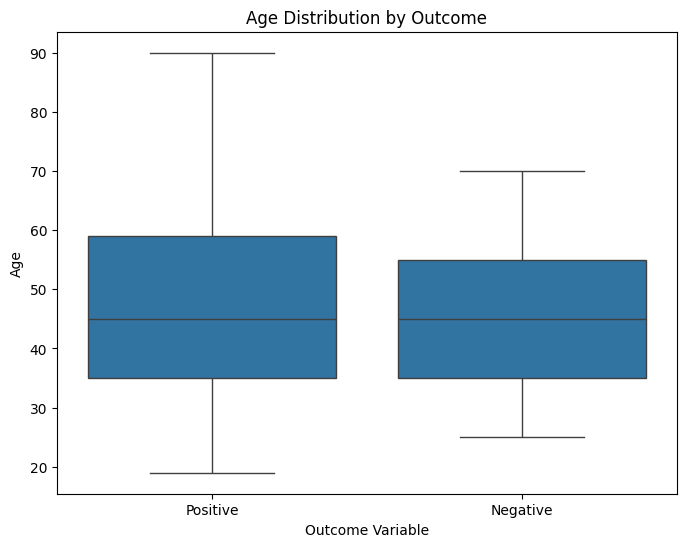

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome Variable', y='Age')
plt.title('Age Distribution by Outcome')
plt.show()

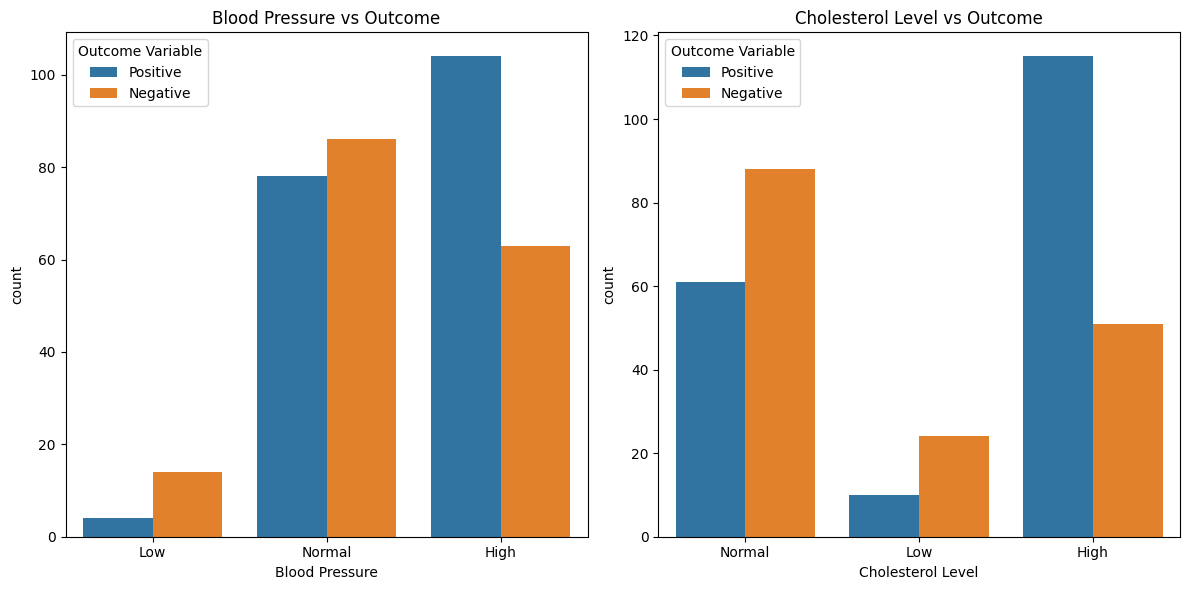

In [22]:
# Blood Pressure and Cholesterol vs Outcome
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='Blood Pressure', hue='Outcome Variable', ax=axes[0])
axes[0].set_title('Blood Pressure vs Outcome')
sns.countplot(data=df, x='Cholesterol Level', hue='Outcome Variable', ax=axes[1])
axes[1].set_title('Cholesterol Level vs Outcome')
plt.tight_layout()
plt.show()

### Correlation between symptoms and Outcome (convert Yes/No to 1/0)

In [31]:
df_encoded = df.copy()
for col in symptom_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})
df_encoded['Outcome Variable'] = df_encoded['Outcome Variable'].map({'Positive': 1, 'Negative': 0})

### Correlation heatmap

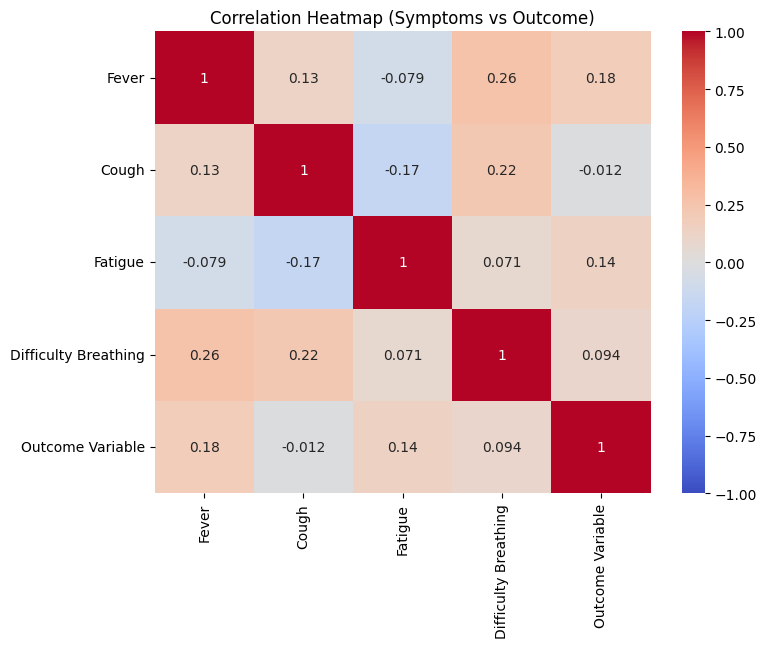

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[symptom_cols + ['Outcome Variable']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Symptoms vs Outcome)')
plt.show()